
# EMATM0048: Software Development Programming and Algorithms (SDPA)
# `Tutorial 7A - Numpy`


NumPy-based algorithms are generally 10 to 100 times faster (or more) than their pure Python counterparts and use significantly less memory.

In [ ]:
!pip install numpy

In [ ]:
import numpy as np
import time
start_time= time.time()
my_arr = np.arange(10000000)
print("time for Numpy", time.time()-start_time)
start_time= time.time()
my_list = list(range(10000000))
print("time for Lists", time.time()-start_time)

## Numpy's basic data structure: the ndarray

ndarray is used for storage of homogeneous data
i.e., all elements the same type
Every array must have a shape and a dtype
Supports convenient slicing, indexing and efficient vectorized computation

In [ ]:
import numpy as np
data1 = [6, 7.5, 8, 0, 1]
arr1 =  np.array(data1)
arr1

In [ ]:
a = np.array([[1,2,3],[4,5,6]],dtype=np.float32)
a

`ndarray:`
- Arrays can have any number of dimensions, including zero (a scalar).
- Arrays are typed: np.uint8, np.int64, np.float32, np.float64
- Arrays are dense. Each element of the array exists and has the same type.


# 1. Array basics
## 1.1 Creating an array

- Using lists or tuples
- homogeneous data: zeros, ones
- diagonal elements: diag, eye
- numerical ranges: arange, linspace, logspace
- random numbers: rand, randint
- Reading from files


In [ ]:
#List of lists
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]  #list of lists
arr2 = np.array(data2)
arr2

In [ ]:
#homogeneous data: zeros, ones
array= np.zeros((2,3))
print (array)
array = np.ones((2,3))
print (array)

In [ ]:
#diagonal elements: diag, eye
array = np.eye(3) 
print (array)
# a diagonal matrix
array= np.diag([1,2,3])
print (array)

In [ ]:
#numerical ranges: arange, linspace, logspace
array = np.arange(0, 10, 2) # arange is an array-valued version of the built-in Python range function
print (array)

In [ ]:
#random numbers: rand, randint
array = np.random.randint(0, 10, (3,3))
print (array)

## 1.2. Type, size and shape of an array

- All elements of an ndarray are of the same type.
- The `ndarray.dtype` property is an attribute that specifies the data type of each element.
- The `ndarray.shape` property is a tuple that indicates the size of each dimension.
- The `ndarray.size` proprety indicates the number of elements in the array



In [ ]:
arr = np.random.randint(0,10,(2,3))
print(arr)
print (arr.size, arr.shape, arr.dtype)

## 1.3 Understanding Axes
In NumPy arrays, axes are zero-indexed and identify which dimension is which. For example, a two-dimensional array has a vertical axis (axis 0) and a horizontal axis (axis 1). Lots of functions and commands in NumPy change their behavior based on which axis you tell them to process.

This example will show how .max() behaves by default, with no axis argument, and how it changes functionality depending on which axis you specify when you do supply an argument:



In [ ]:

table = np.array([
   ...:     [5, 3, 7, 1],
   ...:     [2, 6, 7 ,9],
   ...:     [1, 1, 1, 1],
   ...:     [4, 3, 2, 0],
   ...: ])

table.max()


In [ ]:
table.max(axis=0)

In [ ]:
table.max(axis=1)

By default, .max() returns the largest value in the entire array, no matter how many dimensions there are. However, once you specify an axis, it performs that calculation for each set of values along that particular axis. For example, with an argument of axis=0, .max() selects the maximum value in each of the four vertical sets of values in table and returns an array that has been flattened, or aggregated into a one-dimensional array.

In fact, many of NumPy’s functions behave this way: If no axis is specified, then they perform an operation on the entire dataset. Otherwise, they perform the operation in an axis-wise fashion.

## 1.4 Reshaping an array: 

- Total number of elements cannot change.
- Use -1 to infer axis shape
- Row-major by default (MATLAB is column-major)

In [ ]:
a = np.array([1,2,3,4,5,6])
a = a.reshape(3,2)
print (a)
a = a.reshape(2,-1)
print(a)
a = a.ravel()
print(a)


----------

# 2. Accessing Arrays - Slicing and Indexing
## 2.1 Simple indexing

1d arrays: indexing and slicing as for lists
- first element has index 0
- negative indices count from the end
- slices: [start:stop:step]


In [ ]:
a = np.array([1,2,3,4,5,6])
a = a.reshape(3,2)

In [ ]:
a

In [ ]:
a[2].shape

In [ ]:
a[2,:]

In [ ]:
a[2:, :].shape

## 2.2 Slicing, careful it's a view!
A slice does not return a copy, which means that any modifications will be reflected in the source array. This is a design feature of NumPy to avoid memory problems.

In [ ]:
arr = np.arange(10)
print(arr)          # [0 1 2 3 4 5 6 7 8 9]

In [ ]:
arr_slice = arr[5:8]
print(arr_slice)            # [5 6 7]

In [ ]:
arr_slice[1] = 12345
print(arr)                      # [    0     1     2     3     4     5 12345     7     8     9]

In [ ]:
arr_slice[:] = 64
print(arr)                      # [ 0  1  2  3  4 64 64 64  8  9]

## 2.3 Boolen indexing
Boolean indexing allows you to select data subsets of an array that satisfy a given condition.

In [ ]:
#simple example
arr = np.array([10, 20])
idx = np.array([True, False])
arr[idx]

In [ ]:
arr

In [ ]:
idx

In [ ]:
arr = np.random.randn(10)
arr

In [ ]:
arr<0.5

In [ ]:
#using a boolean index array inplace
arr[arr<0.5]

In [ ]:
#Multiple conditins for masking
arr[(arr<0.5)&(arr>0)]

In [ ]:
#setting the value based on a boolean indexing array
arr[arr< 0] = 0
arr

##  2.4 Fancy indexing: 
list-of-locations indexing

In [ ]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

In [ ]:
#To select out a subset of the rows in a particular order,
#you can simply pass a list or ndarray of integers specifying the desired order
arr[[4, 3, 0, 6]]

In [ ]:
# or using negative indexing
arr[[-3, -5, -7]]

Passing multiple index arrays does something slightly different; it selects a 1D array of
elements corresponding to each tuple of indices:

In [ ]:
arr = np.arange(32).reshape((8, 4))
arr

In [ ]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

Take a moment to understand what just happened: the elements (1, 0), (5, 3), (7,
1), and (2, 2) were selected.

---------------

# 3. Scalar-array operations
We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [ ]:
A = np.array([[1,1],[3,3]])
A

In [ ]:
A * 2

In [ ]:
A + 2

# 4.  Element-wise array-array operations: Broadcasting
When we add, subtract, multiply and divide arrays with each other, the default behaviour is element-wise operations. Vectorized operations between arrays of different sizes and between arrays and scalars are subject to the rules of broadcasting. The idea is quite simple in many cases like with scalars:

In [ ]:
print (A)
print (A * A) # element-wise multiplication

The case of arrays of different shapes is slightly more complicated.
When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions, and works its way forward. 
see http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

In [ ]:
#sizes are adjusted. that is called broadcasting and we look into this later
v1= np.arange(0,2)
print (A) #2x2
print (v1)# 1x2
A * v1

### When broadcase can fail?
Only one array gets broadcasted. If both need to be adjusted, that will trigger an error

In [ ]:
A= np.ones([7,8])
A

In [ ]:
B= np.ones([9,3])
B

In [ ]:
A+B

----------

# 5. Universal Functions: Fast Element-wise Array Functions
A universal function, or ufunc, is a function that performs elementwise operations on
data in ndarrays. You can think of them as fast vectorized wrappers for simple functions
that take one or more scalar values and produce one or more scalar results. For a full list of unfunc, check https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs
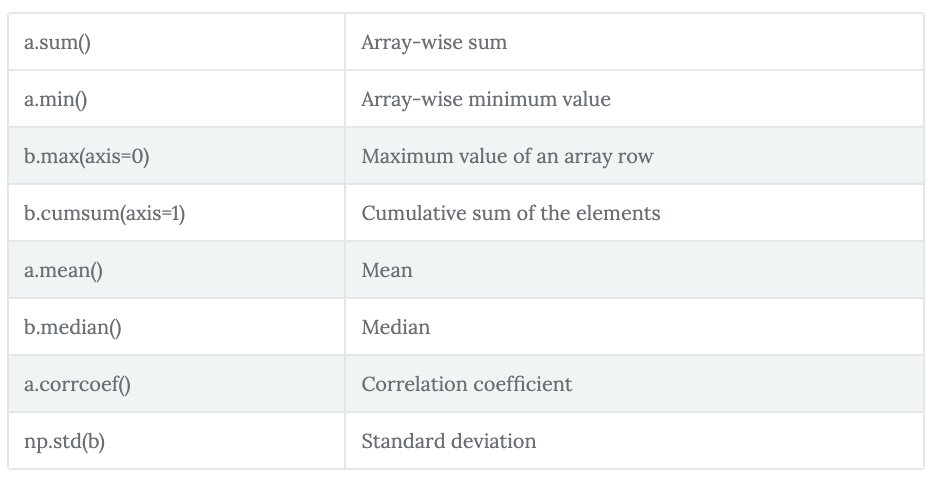

In [ ]:
#Many ufuncs are simple elementwise transformations, like sqrt or exp:
arr = np.random.randint(0, 10, (3,3))
print(arr)

In [ ]:
np.sqrt(arr)

In [ ]:
np.exp(arr)

A set of mathematical functions which compute statistics about an entire array or about
the data along an axis are accessible as array methods. Aggregations (often called
reductions) like sum, mean, and standard deviation std can either be used by calling the
array instance method or using the top level NumPy function:

In [ ]:
arr.mean()
#or 
np.mean(arr)

In [ ]:
arr.sum()

Functions like mean and sum take an optional axis argument which computes the statistic
over the given axis, resulting in an array with one fewer dimension:

In [ ]:
arr.mean(axis=0)

# Excersises:

## Ex 1: 
Write a NumPy program to create a 2d array with 1 on the border and 0 inside.

Original array:
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
 
 
**Expected output:** 1 on the border and 0 inside in the array
[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]

## Ex 2: 
Write a NumPy program to convert the values of Fahrenheit degrees into celsius degrees. 

**Expected Output:**
Values in Fahrenheit degrees:
[ 0. 12. 45.21 34. 99.91]
Values in celsius degrees:
[-17.77777778 -11.11111111 7.33888889 1.11111111 37.72777778]

## Ex 3:
Write a NumPy program to get the values and indices of the elements that are bigger than 10 in a given array.

Original array:                                                        
[[ 0 10 20]
 [20 30 40]]                                                           
**Expected output:**
Values bigger than 10 = [20 20 30 40]                                  
Their indices are  (array([0, 1, 1, 1]), array([2, 0, 1, 2]))


## Ex 4: 
Write a Python NumPy program to compute the weighted average for two arrays. 

The weighted arithmetic mean is similar to an ordinary arithmetic mean (the most common type of average), except that instead of each of the data points contributing equally to the final average, some data points contribute more than others. The notion of weighted mean plays a role in descriptive statistics and also occurs in a more general form in several other areas of mathematics.

Basic example
Given two school classes, one with 20 students, and one with 30 students, the grades in each class on a test were:
Morning class = 62, 67, 71, 74, 76, 77, 78, 79, 79, 80, 80, 81, 81, 82, 83, 84, 86, 89, 93, 98
Afternoon class = 81, 82, 83, 84, 85, 86, 87, 87, 88, 88, 89, 89, 89, 90, 90, 90, 90, 91, 91, 91, 92, 92, 93, 93, 94, 95, 96, 97, 98, 99

Weighted average is : 86 

## Ex 5: 
Replace all odd numbers in the given array with -1. 

Sample input: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

**Expected output:** [ 0 -1  2 -1  4 -1  6 -1  8 -1]


## Ex #6: 
Compute averages using a sliding window over an array?

Example: take the input [5, 2, 4, 6, 3, 1].A slidinhg winodow of size 2 is applied. The current sum of the pair, [5,2] is 7. Continue iterating through the entire array. One must slide the window up by 1 to reach the next iteration. The result is [3.5,3, 5, 4.5, 2]. Try with different window sizes. 

- More excercises at https://github.com/rougier/numpy-100
    

## Challenges: 

 ## Ch #1: 
 Consider the vector [1, 2, 3, 4, 5], how to build a new vector with 3 consecutive zeros interleaved between each value?


## Ch #2:
Create a 2D array subclass to create a symmetric matrix from random numbers such that Z[i,j] == Z[j,i]
An example symmetric matrix will look like:


[[ 1, 10,  7, 11,  3],

[10,  0,  8, 15,  2],


[ 7,  8,  9,  6,  6],

[11, 15,  6,  9, 12],
          
          
[ 3,  2,  6, 12,  2]]


## Ch #3: 
10 fish occupy a 5x5x5 grid of water. Each fish decides to move to a new (i,j,k) location given by the matrix below. If multiple fish end up occupying the same cell, the biggest fish eats the smaller fish. Determine which fish will survive.

In [ ]:
locs = np.array([
    [0,0,0],
    [1,1,2],
    [0,0,0],
    [2,1,3],
    [5,5,4],
    [5,0,0],
    [5,0,0],
    [0,0,0],
    [2,1,3],
    [1,3,1]
])
generator = np.random.default_rng(1010)
weights = generator.normal(2,size=10)
print(weights)